# 绘制动画

为了支持动画计算, 先定义如下两个函数, 用于计算 $sin(x)$ 曲线在 `x` 坐标位置的斜率以及在此斜率基础上的一条切线

In [20]:
import numpy as np


def calculate_slope(x: float) -> float:
    """计算所给 x 坐标对应 sin 曲线的斜率

    已知直线上的两个点 `(x1, y1), (x2, y2)`, 则斜率 `k = (y2 - y1) / (x2 - x1)`

    Args:
        `x` (`float`): X 轴坐标值

    Returns:
        `float`: 斜率值
    """
    # 将 x 坐标后移 0.05 个单位, 计算 y 轴坐标
    x1: float = x + 0.05
    y1: float = np.sin(x1)

    # 将 x 坐标前移 0.05 个单位, 获取 y 轴坐标
    x2: float = x - 0.05
    y2: float = np.sin(x2)

    # 计算斜率
    return (y2 - y1) / (x2 - x1)


def calculate_tangent_line(
    x: float, y: float, k: float
) -> tuple[np.ndarray, np.ndarray]:
    """已知斜率, 计算指定坐标点的切线

    Args:
        `x` (`float`): x 轴坐标值
        `y` (`float`): y 轴坐标值
        `k` (`float`): 斜率值

    Returns:
        tuple[ndarray, ndarray]: 切线 x 轴坐标值和 y 轴坐标值
    """
    # 将 x 坐标点 1 个单位分割为 100 份
    xs = np.linspace(x - 0.5, x + 0.5, 100)

    # 通过斜率计算切线在 y 轴的坐标
    # 通过 x 坐标的变化量计算 y 坐标的变化量, 从而计算 y 坐标值
    ys = y + k * (xs - x)
    return xs, ys

绘制动画的基本方法是:

- 定义绘图元素 (线、点、文本等)
- 通过 `matplotlib.animation` 模块下的 `FuncAnimation` 类创建动画, 定义 `FuncAnimation` 对象需要如下几个要素:
  - `fig`: 绘图对象
  - `func`: 绘图函数, 在本例中为 `update` 函数, 用于更新绘图元素, 以产生动画效果
  - `frames`: 帧数, 一共绘制多少帧
  - `interval`: 帧间隔

/home/alvin/Workspace/Study/study-python/algorithms/matplotlib/.venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


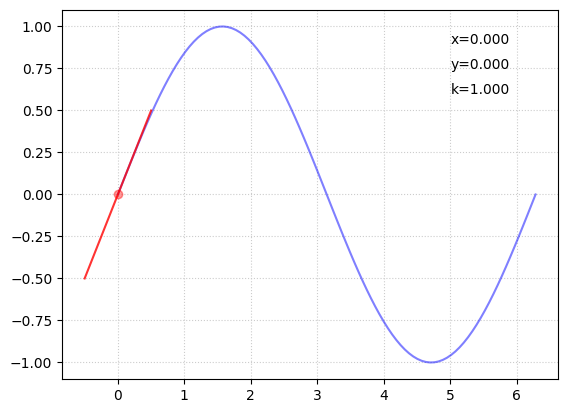

In [21]:
from typing import Iterable

import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from matplotlib.artist import Artist

# 用于在 jupyter notebook 中显示动画预设命令, 可以为 %matplotlib inline, %matplotlib notebook, %matplotlib widget
%matplotlib inline

# 初始化画布
fig = plt.figure()

# 绘制网格
plt.grid(
    ls=":",  # 网格线型
    color="#ccc",  # 网格颜色
)

# 计算 2pi 弧度内 100 个 x 轴坐标
x = np.linspace(0, 2 * np.pi, 100)

# 计算对应的 y 轴坐标
y = np.sin(x)

# 绘制正弦曲线
plt.plot(x, y, "b", alpha=0.5)

# 绘制 x, y 的坐标标识
x_text = plt.text(5, 0.9, "", fontsize=10)
y_text = plt.text(5, 0.75, "", fontsize=10)
k_text = plt.text(5, 0.6, "", fontsize=10)

# 绘制曲线上的切点
(point,) = plt.plot(0, 0, "r", alpha=0.4, marker="o")


k = calculate_slope(x[0])  # 计算斜率
xs, ys = calculate_tangent_line(x[0], y[0], k)  # 计算切线

# 绘制切线
# plot 函数返回一个 Line2D 集合, 并获取第一个
(tangent_line,) = plt.plot(xs, ys, c="r", alpha=0.8)


def update(n: np.int64) -> Iterable[Artist]:
    """更新动画帧函数

    该函数会被不断被回调, 由该函数计算并修改每一帧各绘图元素的坐标, 并返回各绘图元素

    Args:
        `n` (`np.int64`): 帧数

    Returns:
        `Iterable[Artist]`: 绘图元素集合, 这些元素会被重新绘制, 以呈现动画效果
    """
    # 计算切线坐标
    k = calculate_slope(x[n])  # 计算斜率
    xs, ys = calculate_tangent_line(x[n], y[n], k)  # 计算切线

    # 更新曲线上的切点坐标
    point.set_data((x[n],), (y[n],))

    # 更新切线的坐标
    tangent_line.set_data(xs, ys)

    # 更新坐标标识
    x_text.set_text(f"x={x[n]:.3f}")
    y_text.set_text(f"y={y[n]:.3f}")
    k_text.set_text(f"k={k:.3f}")

    return point, tangent_line, x_text, y_text, k_text


# 设置动画
anim = FuncAnimation(  # 这里必须要对变量赋值, 否则动画无法播放
    fig=fig,
    func=update,
    frames=np.arange(0, 100),
    interval=100,
    blit=True,
)

# 将动画保存为 gif 格式文件
# anim.save("animation.gif", writer="pillow")

# 显示绘图
plt.show()